## Avocado Data EDA & Price Forecasting

##### Author: Yebin Hwang

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

In [127]:
import numpy as np
import pandas as pd, datetime
import seaborn as sb
import matplotlib.pyplot as plt

!pip install plotly==5.10.0
import plotly as ply

from time import time
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame

!pip install prophet
from prophet import Prophet
from scipy.stats import boxcox

You should consider upgrading via the '/Users/yebinhwang/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/yebinhwang/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


## 1. Explore Data

In [ ]:
#import data
df = pd.read_csv("/Users/yebinhwang/Downloads/avocado.csv")

In [4]:
#show data
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015/01/04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015/01/04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015/01/04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015/01/04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015/01/04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


In [6]:
#check missing values: there is no missing values
df.isnull().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

In [96]:
#convert value type of Date
df['date'] = pd.to_datetime(df['date'])

In [8]:
#check value type of Date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           33045 non-null  datetime64[ns]
 1   average_price  33045 non-null  float64       
 2   total_volume   33045 non-null  float64       
 3   4046           33045 non-null  float64       
 4   4225           33045 non-null  float64       
 5   4770           33045 non-null  float64       
 6   total_bags     33045 non-null  float64       
 7   small_bags     33045 non-null  float64       
 8   large_bags     33045 non-null  float64       
 9   xlarge_bags    33045 non-null  float64       
 10  type           33045 non-null  object        
 11  year           33045 non-null  int64         
 12  geography      33045 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 3.3+ MB


In [97]:
#show data
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [10]:
# Total number of rows = reviews
len(df)

33045

In [11]:
# Total number of columns = variables
len(df.columns)

13

In [12]:
# Year
df['year'].value_counts()

2017    5722
2016    5616
2019    5616
2015    5615
2018    5292
2020    5184
Name: year, dtype: int64

In [13]:
# Avocado Type
df['type'].value_counts()

conventional    16524
organic         16521
Name: type, dtype: int64

In [14]:
# Region
#contains both "City" and aggregated rows by region and states (ex: New York and Northeast)
df['geography'].value_counts()

Jacksonville            612
Richmond/Norfolk        612
Syracuse                612
St. Louis               612
Detroit                 612
Albany                  612
Buffalo/Rochester       612
Charlotte               612
Miami/Ft. Lauderdale    612
Houston                 612
Baltimore/Washington    612
Portland                612
Boise                   612
Seattle                 612
New Orleans/Mobile      612
Harrisburg/Scranton     612
Chicago                 612
New York                612
Spokane                 612
Phoenix/Tucson          612
Columbus                612
Pittsburgh              612
Midsouth                612
California              612
Plains                  612
Orlando                 612
Hartford/Springfield    612
Southeast               612
West                    612
Denver                  612
South Carolina          612
Northern New England    612
Tampa                   612
Atlanta                 612
Sacramento              612
Indianapolis        

In [117]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
average_price,33045.0,1.379941,3.789718e-01,0.44,1.10,1.35,1.62,3.25
total_volume,33045.0,968399.676291,3.934533e+06,84.56,15118.95,129116.98,505828.46,63716144.15
4046,33045.0,302391.405241,1.301026e+06,0.00,767.31,10994.77,119021.85,22743616.17
4225,33045.0,279769.300885,1.151052e+06,0.00,2712.47,23436.00,135238.94,20470572.61
4770,33045.0,21482.550773,1.001607e+05,0.00,0.00,178.09,5096.53,2546439.11
total_bags,33045.0,364673.476366,1.564004e+06,0.00,9121.86,53222.24,174431.43,31689188.60
small_bags,33045.0,250198.016346,1.037734e+06,0.00,6478.63,36876.99,120662.40,20550406.59
large_bags,33045.0,106732.875171,5.167226e+05,0.00,466.29,6375.86,40417.23,13327600.76
xlarge_bags,33045.0,7742.584637,4.819803e+04,0.00,0.00,0.00,804.44,1403184.04
year,33045.0,2017.460887,1.699747e+00,2015.00,2016.00,2017.00,2019.00,2020.00


### [1] Multi-dimensional data point graph

In [ ]:
#import matplotlib.pyplot as plt

<AxesSubplot:xlabel='date', ylabel='average_price'>

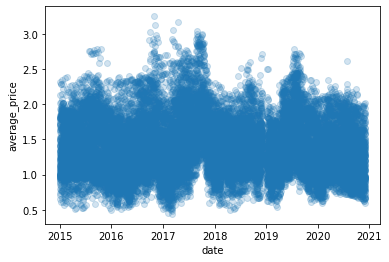

In [131]:
sns.regplot(x = "date", y="average_price", data=df2, fit_reg = False, scatter_kws={"alpha": 0.2})

### [2] Avocado Product Examination

#### 2-1. Price Distribution

In [119]:
print(df.loc[df['type'] == 'conventional', 'average_price'].mean())
print(df.loc[df['type'] == 'organic', 'average_price'].mean())

1.144735536189786
1.615188547908717


In [133]:
#import seaborn as sb

/Users/yebinhwang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_price', ylabel='Density'>

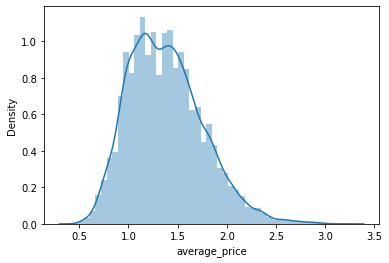

In [101]:
sb.distplot(df['average_price'])

#### 2-2. Price Historical Trend

In [61]:
#import matplotlib.pyplot as plt
#import seaborn as sns

##### (1) All
> 2019 Dec data is missing

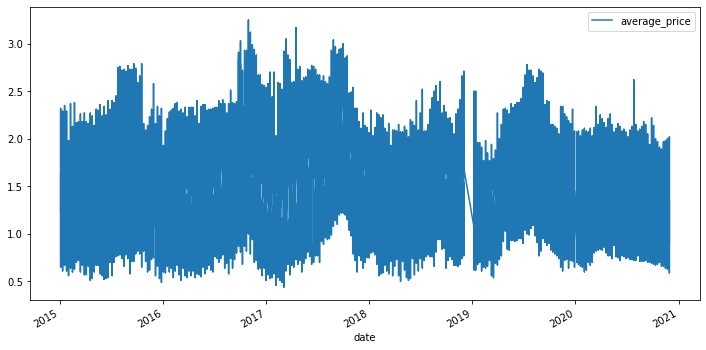

In [100]:
df['date'] = pd.to_datetime(df['date'])
ax = df.plot(x="date", y="average_price", figsize=(12,6))

##### (2) by Product

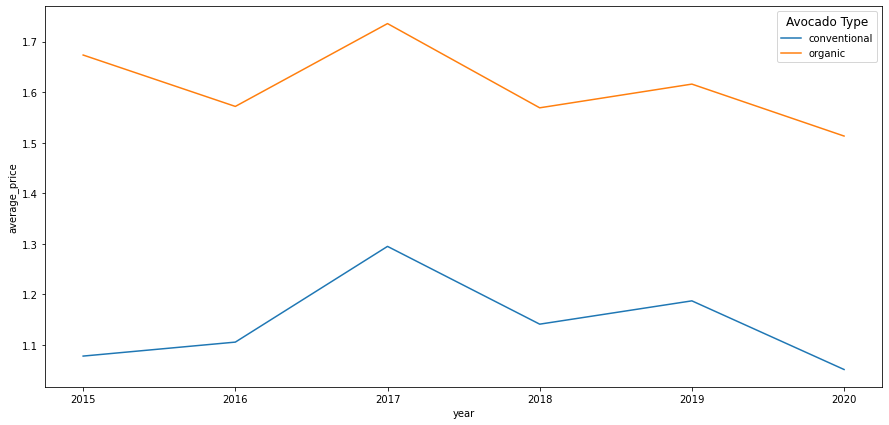

In [99]:
fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(data=df, x="year", y="average_price", hue="type", ci = None)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title = 'Avocado Type', title_fontsize = 12)
plt.show()

## 2. Price Prediction Model

In [155]:
#import numpy as np
#import pandas as pd, datetime
#import seaborn as sb
#import matplotlib.pyplot as plt

#!pip install plotly==5.10.0
#import plotly as ply

#from time import time
#from math import sqrt
#from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#import itertools
#import statsmodels.api as sm
#from statsmodels.tsa.stattools import acf,pacf
#from statsmodels.tsa.arima_model import  ARIMA
#from sklearn import model_selection
#from sklearn.metrics import mean_squared_error, r2_score
#from pandas import DataFrame

#!pip install prophet
#from prophet import Prophet

In [142]:
#import data
df = pd.read_csv("/Users/yebinhwang/Downloads/Resume/@Amazon/avocado_geoclean_revenue.csv")

/Users/yebinhwang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [143]:
df.head()

,date,average_price,total_volume,revenue,4046,4046_revenue,4225,4225_revenue,4770,4770_revenue,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography_city,geography_state,geography_state2
0,2015/01/04,0.65,1048062.16,"$681,240.40",770635.37,"$500,912.99",178418.32,"$115,971.91",6509.41,"$4,231.12",92499.06,92499.06,0.00,0.0,conventional,2015,Phoenix/Tucson,Arizona,NaN
1,2015/01/04,1.12,17296.85,"$19,372.47",14569.66,"$16,318.02",1868.59,"$2,092.82",0.00,$0.00,858.60,830.00,28.60,0.0,organic,2015,Phoenix/Tucson,Arizona,NaN
2,2015/01/11,0.61,1110753.05,"$677,559.36",849580.75,"$518,244.26",182629.59,"$111,404.05",12237.43,"$7,464.83",66305.28,66305.28,0.00,0.0,conventional,2015,Phoenix/Tucson,Arizona,NaN
3,2015/01/11,1.36,14035.18,"$19,087.84",11523.29,"$15,671.67",1632.63,"$2,220.38",0.00,$0.00,879.26,876.68,2.58,0.0,organic,2015,Phoenix/Tucson,Arizona,NaN
4,2015/01/18,0.67,1088608.66,"$729,367.80",811662.62,"$543,813.96",200514.36,"$134,344.62",5643.07,"$3,780.86",70788.61,70788.61,0.00,0.0,conventional,2015,Phoenix/Tucson,Arizona,NaN


### Price Prediction for the next 3 years

### [1] All (Organic and Conventional)

In [144]:
# date 
df['date'] = pd.to_datetime(df['date'])


In [147]:
# Data set 
df = df.drop(['total_volume', 'revenue', '4046', '4046_revenue', '4225', '4225_revenue', '4770', '4770_revenue', 'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'year', 'geography_city', 'geography_state2'], axis=1)
df = df.rename(columns={'average_price': 'y', 'date': 'ds'})
df.head()

,ds,y,type,geography_state
0,2015-01-04,0.65,conventional,Arizona
1,2015-01-04,1.12,organic,Arizona
2,2015-01-11,0.61,conventional,Arizona
3,2015-01-11,1.36,organic,Arizona
4,2015-01-18,0.67,conventional,Arizona


### [1]-1 with predefined Lambda from Prophet Package

16:38:35 - cmdstanpy - INFO - Chain [1] start processing
16:38:48 - cmdstanpy - INFO - Chain [1] done processing


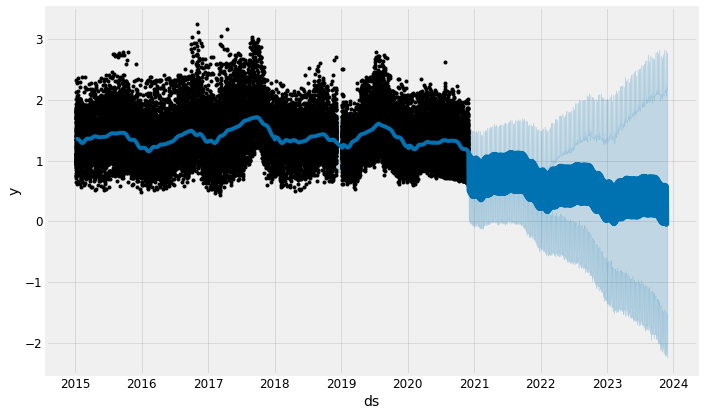

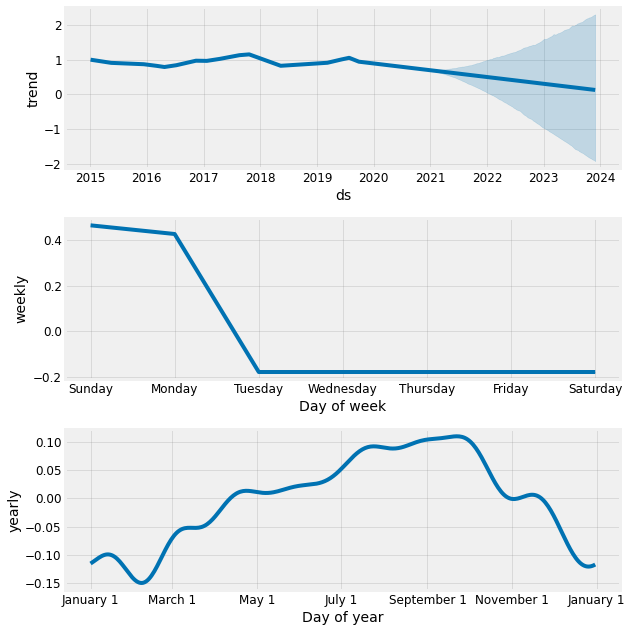

In [149]:
dfpred = Prophet().fit(df)
future_dfpred = dfpred.make_future_dataframe(periods=1095)
forecast_dfpred = dfpred.predict(future_dfpred)

fig1 = dfpred.plot(forecast_dfpred)
fig2 = dfpred.plot_components(forecast_dfpred)

### [1]-2 Find optimal Lambda for the dataset

In [169]:
#from scipy.stats import boxcox

In [175]:
# Apply Box-Cox Transform to value column and assign to new column y
df['y'], lam = boxcox(df['y'])

In [184]:
m = Prophet()

In [185]:
m.fit(df)

18:23:53 - cmdstanpy - INFO - Chain [1] start processing
18:24:00 - cmdstanpy - INFO - Chain [1] done processing


#### Forecast

In [189]:
future = m.make_future_dataframe(periods=1095)
forecast = m.predict(future)

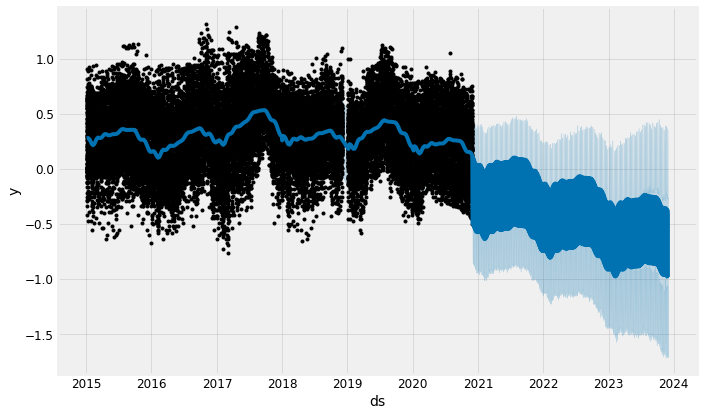

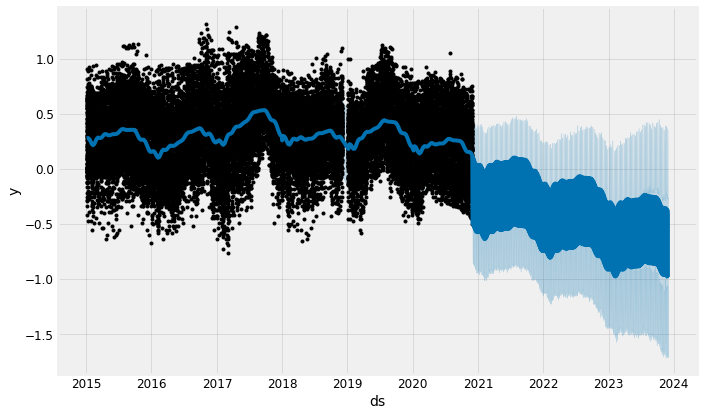

In [190]:
m.plot(forecast)

#### breakdown

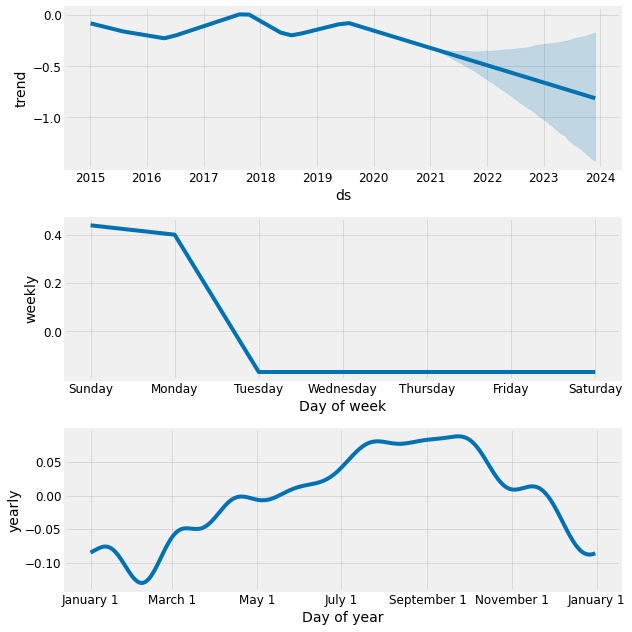

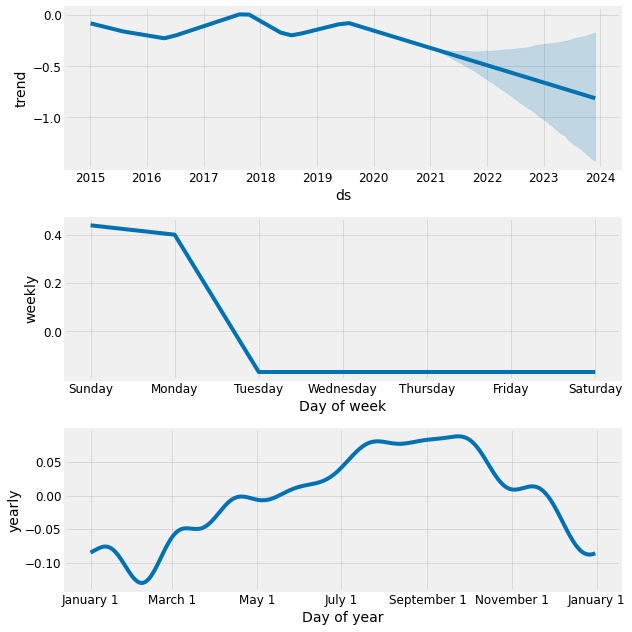

In [191]:
m.plot_components(forecast)

Optimal lambda from package provides a more narrow forecasting range than the lambda from the dataset and thus **[2] Organic and [3] Conventional will use predefined lambda for price projection**.

### [2] Organic

In [194]:
# Data set 
org = df[df["type"]=="organic"]
org.head()

,ds,y,type,geography_state
1,2015-01-04,0.114526,organic,Arizona
3,2015-01-11,0.316408,organic,Arizona
5,2015-01-18,0.316408,organic,Arizona
7,2015-01-25,0.449516,organic,Arizona
9,2015-02-01,0.168077,organic,Arizona


### Predefined Lambda from Prophet Package

17:21:51 - cmdstanpy - INFO - Chain [1] start processing
17:21:53 - cmdstanpy - INFO - Chain [1] done processing


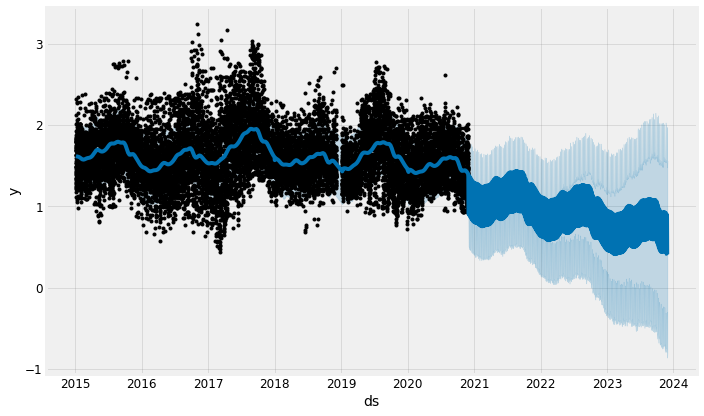

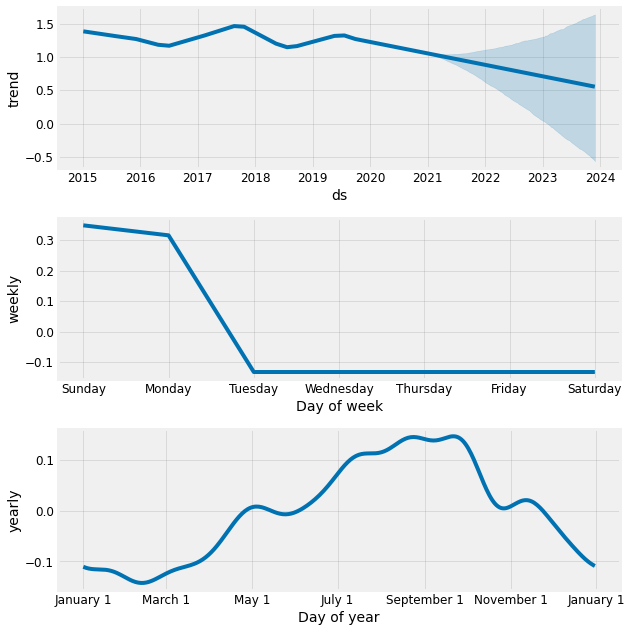

In [152]:
orgpred = Prophet().fit(org)
future_orgpred = orgpred.make_future_dataframe(periods=1095)
forecast_orgpred = orgpred.predict(future_orgpred)
fig1 = orgpred.plot(forecast_orgpred)
fig2 = orgpred.plot_components(forecast_orgpred)

### [3] Conventional

In [153]:
# Data set 
conv = df[df["type"]=="conventional"]
conv.head()

,ds,y,type,geography_state
0,2015-01-04,0.65,conventional,Arizona
2,2015-01-11,0.61,conventional,Arizona
4,2015-01-18,0.67,conventional,Arizona
6,2015-01-25,0.61,conventional,Arizona
8,2015-02-01,0.56,conventional,Arizona


### Predefined Lambda from Prophet Package

17:23:16 - cmdstanpy - INFO - Chain [1] start processing
17:23:20 - cmdstanpy - INFO - Chain [1] done processing


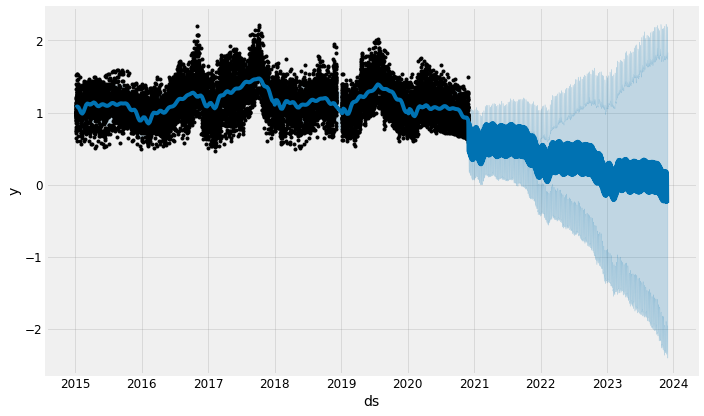

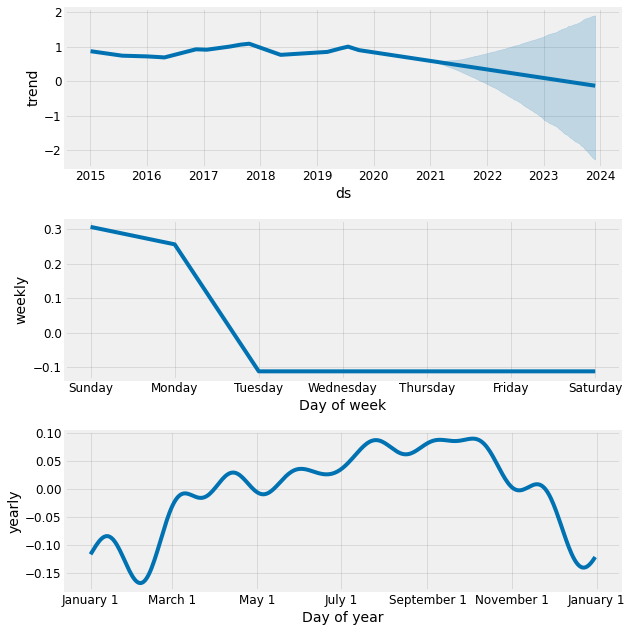

In [154]:
convpred = Prophet().fit(conv)
future_convpred = convpred.make_future_dataframe(periods=1095)
forecast_convpred = convpred.predict(future_convpred)
fig1 = convpred.plot(forecast_convpred)
fig2 = convpred.plot_components(forecast_convpred)